<a href="https://colab.research.google.com/github/saxonmahar/Data_Science/blob/main/k_measn_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score


In [3]:
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [5]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)


In [6]:
k = 3
kmeans = KMeans(n_clusters=k, random_state=42)
kmeans.fit(scaled_data)

df['Cluster'] = kmeans.labels_


In [7]:
score = silhouette_score(scaled_data, kmeans.labels_)
print(f"Silhouette Score for k={k}: {score}")


Silhouette Score for k=3: 0.4798814508199817


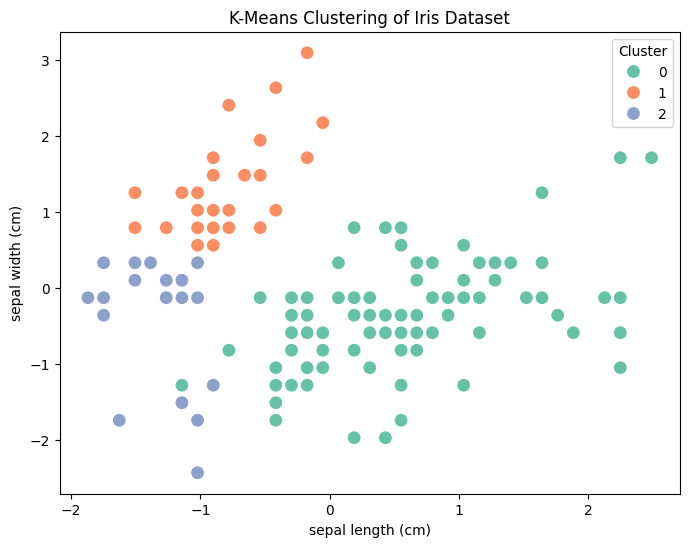

In [8]:
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0],
    y=scaled_data[:, 1],
    hue=df['Cluster'],
    palette='Set2',
    s=100
)
plt.title('K-Means Clustering of Iris Dataset')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.legend(title='Cluster')
plt.show()


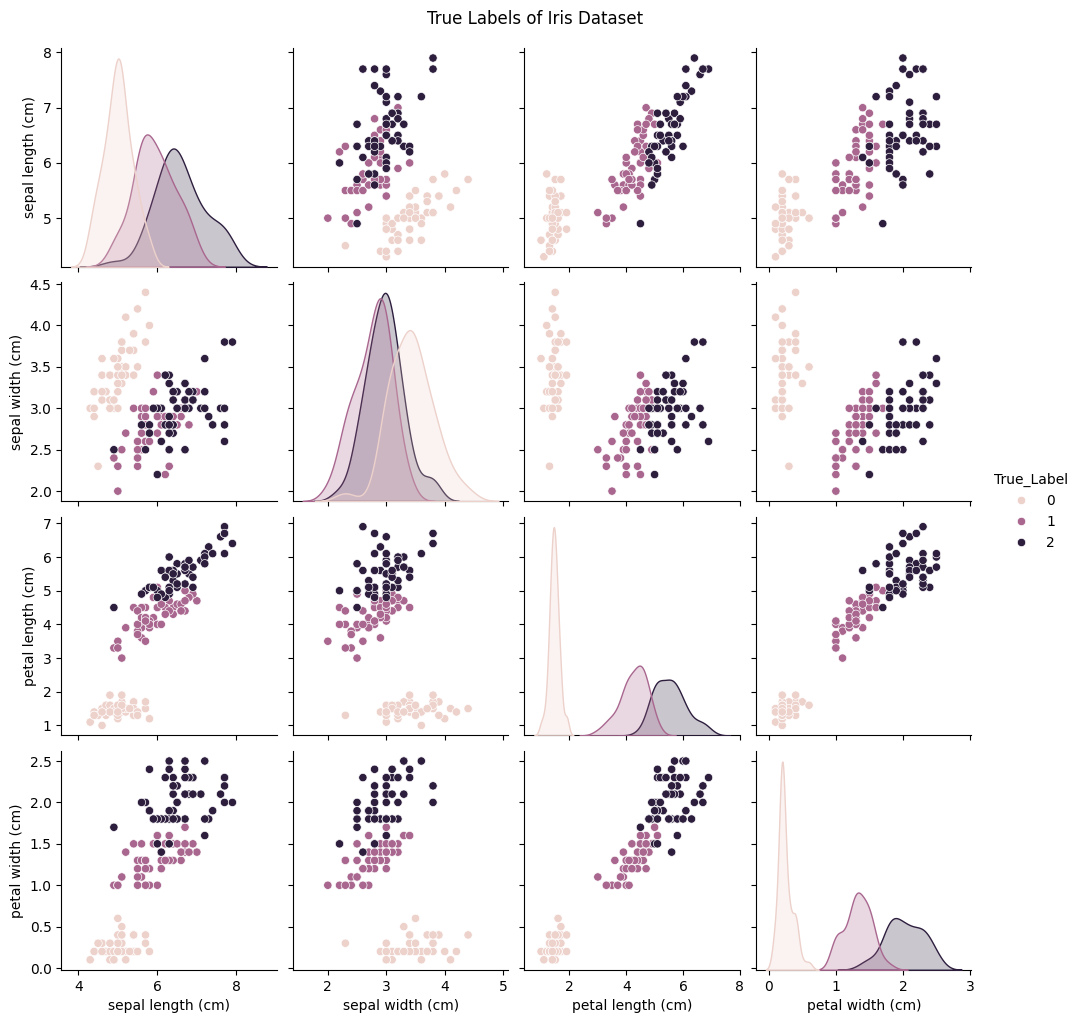

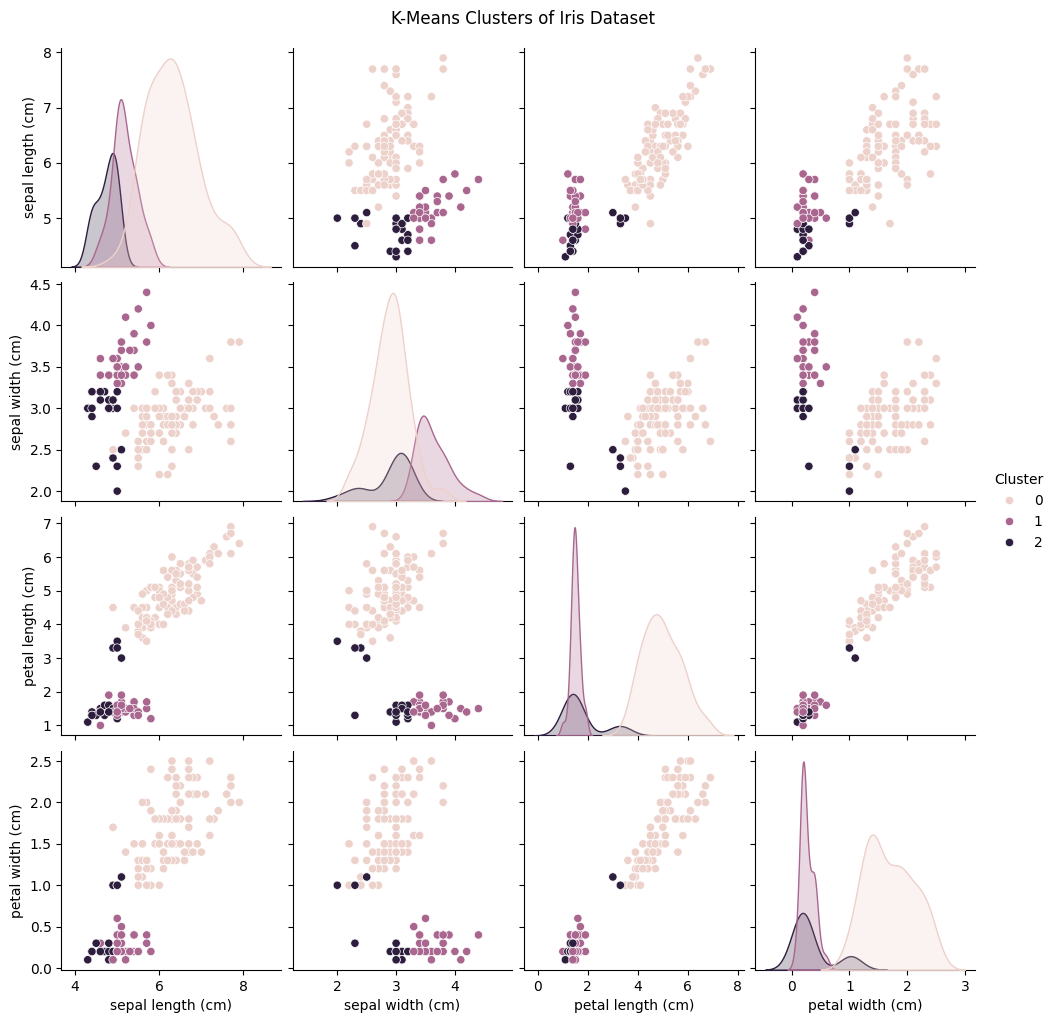

In [9]:
df['True_Label'] = iris.target
sns.pairplot(df, hue='True_Label', vars=iris.feature_names)
plt.suptitle("True Labels of Iris Dataset", y=1.02)
plt.show()

sns.pairplot(df, hue='Cluster', vars=iris.feature_names)
plt.suptitle("K-Means Clusters of Iris Dataset", y=1.02)
plt.show()
